# CPL Data Analysis

### Loading The Data

In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# load each csv file and store them in a dictionary
data_path = '../data/'
data_dict = {}

for i, file in enumerate(os.listdir(data_path)):
    if file.endswith(".csv"):
        data_dict[file.split(".")[0]] = pd.read_csv(os.path.join(data_path, file))
        
data_dict.keys()

dict_keys(['CPL-Player-By-Game-2019', 'CPL-Team-Totals-2019', 'CPL-Team-By-Game-2019', 'CPL-Player-Totals-2019'])

In [394]:
# get player totals and drop players with less than 450 mins game time
player_totals = data_dict['CPL-Player-Totals-2019']
player_totals = player_totals[player_totals.Min > 450].drop("Rank", axis=1)
player_totals.head()

,GM,playerId,optaPersonId,Min,Age,Position,firstName,lastName,player,team,...,PsCmpA3,PsCmpD3,PsAttD3,PsAttM3,Pull Back Passes Completed,PsDist,ChlngeLost,Aerial%,Aerials,ExpGAg
0,28,d3uo72swkorck8mo41kv1yp61,423548,2470,23.0,Left Centre Back,Daniel,Krutzen,D. Krutzen,Forge,...,54,459,607,873,0,22.8,16,55.8%,86,0.0
1,29,7lqj7hx4na2kvl5doan797vmx,250776,2425,25.0,Right Centre Back,Dominick,Zator,D. Zator,Cavalry,...,67,523,697,638,0,21.8,11,61.1%,149,0.0
2,25,622w13rktz2os2jlo286col3p,168505,2159,24.0,Central Midfielder,Manuel,Aparicio,M. Aparicio,York9,...,197,123,172,837,0,17.5,49,34.2%,38,0.0
3,28,2zedqkn15thv6wx5xmgv48gd1,140123,2443,29.0,Central Midfielder,Kyle,Bekker,K. Bekker,Forge,...,296,118,162,862,0,19.4,25,40.5%,42,0.0
4,28,6o11en42rzgf741oqqlu9a47p,159509,2520,24.0,Right Centre Back,Luca,Gasparotto,L. Gasparotto,York9,...,13,716,830,535,0,20.6,10,76.5%,162,0.0


# Profiling CPL Central Midfielders

Obtaining data for all central midfielders (DMs, CMs, CAMs) in the CPL and isolating metrics for creativity, defensive contribution and offensive contribution (goals, shooting) into separate datasets for visualisation.

In [395]:
# get all central midfielders
cm_positions = {"Central Midfielder", "Defensive Midfielder", "Centre Attacking Midfielder"}
cm_totals = player_totals[player_totals['Position'].apply(lambda a: a in cm_positions)].reset_index(drop=True)

In [396]:
# categorise types of features
general_features = [
    "GM", "Min", "Age", "Position", "player",
    "team"
]

# features used to measure central midfielders
cm_features = [
    "SOG","SOTInBox","Off","OffTgtOBox","ShotDirFK",
    "GoalDirFK","GoalInBx","GoalOBx","GoalOP","PsOpHfFl",
    "PsOnHfFl","PsAtt","PsOnHfScs","PsOpHfScs","ExpG","ExpA",
    "BgChncCrtd","ChncOpnPl","ChncSetPl","1v1","1v1InBox","Sc1v1InBox","SucflDuels",
    "Success1v1","ThrghBalls","ThrghBlCmp","Touches","DuelLs",
    "FailTackle","SucflTkls","Int","DefTouch","TcklMade%",
    "Clrnce","HeadClear","Recovery","Turnover",
    "Disposs","TchsA3","TchsD3","TchsM3","TouchOpBox",
    "%PassFwd","Pass%","PsCmpM3","PsCmpA3","PsCmpD3",
    "PsAttD3","PsAttM3","PsDist","ChlngeLost","Aerial%",
    "Aerials","ErrShot", "Goal"
]

# create CM dataframe with only relevant metrics
cm_totals = cm_totals[cm_features + general_features]

# generate some missing metrics
cm_totals['PsAttA3'] = cm_totals['PsAtt'] - (cm_totals['PsAttD3'] + cm_totals['PsAttM3']) # total passes in A3
cm_totals['ChncCrtd'] = cm_totals['ChncOpnPl'] + cm_totals['ChncSetPl']
cm_totals['AerialWn'] = round(cm_totals['Aerials'] * (cm_totals['Aerial%'].str.rstrip('%').astype('float') / 100.0))

# Dividing Into Play Style Metrics

In [429]:
# Creative Metrics
creative_metrics = [
    "PsAtt", "%PassFwd", "ExpA", "BgChncCrtd", "1v1", 
    "Success1v1", "ThrghBalls", "ThrghBlCmp", "DuelLs", "SucflDuels",
    "Turnover", "TchsA3","TchsD3","TchsM3", "TouchOpBox", "Pass%", 
    "PsCmpM3","PsCmpA3","PsCmpD3","PsAttD3","PsAttM3","PsAttA3","PsDist", "Touches"
]

# Offensive Metrics

# Defensive Metrics
def_metrics = ["player","team","Min","Int", "Clrnce", "Recovery","SucflTkls", "AerialWn"]

# create dfs for creative, offensive, defensive metrics
cm_creative = cm_totals[creative_metrics]
cm_def = cm_totals[def_metrics]

cm_def.head()

,player,team,Min,Int,Clrnce,Recovery,SucflTkls,AerialWn
0,M. Aparicio,York9,2159,31,8,160,29,13.0
1,K. Bekker,Forge,2443,18,20,162,17,17.0
2,J. Büscher,Cavalry,1768,30,16,187,43,11.0
3,A. Gonzalez,Pacific,1746,21,15,163,29,17.0
4,M. Bustos,Valour,2249,12,3,105,19,11.0


# Defensive Data

Visualising defensive metrics for the CPL's central midfielders.

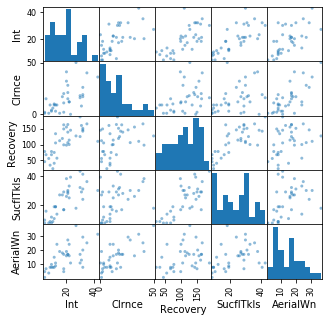

In [431]:
from pandas.plotting import scatter_matrix

scatter_matrix(cm_def.drop('Min', axis=1), figsize=(5,5))
plt.show()

### Adjusting For Possession

In [591]:
team_totals = data_dict['CPL-Team-Totals-2019']

team_totals['TchPG'] = team_totals['Touches']/team_totals['GM'] # Touches Per Game
team_totals['TchPGDiff'] = team_totals['TchPG'] - (team_totals['TchPG'].mean())  # difference of TpG proportion from mean value
team_totals['TchPGAdj'] = team_totals['TchPGDiff']/team_totals['TchPG']

In [433]:
def get_pos_adj(team):
    team_row = team_totals.loc[team_totals['team'] == team]
    pos_adj = team_row['TchPGAdj'].values[0]
    return pos_adj + 1

cm_def.loc[:,'PosAdj'] = cm_def['team'].apply(lambda a: get_pos_adj(a))

cm_def.head()

,player,team,Min,Int,Clrnce,Recovery,SucflTkls,AerialWn,PosAdj
0,M. Aparicio,York9,2159,31,8,160,29,13.0,1.084264
1,K. Bekker,Forge,2443,18,20,162,17,17.0,1.049918
2,J. Büscher,Cavalry,1768,30,16,187,43,11.0,0.997991
3,A. Gonzalez,Pacific,1746,21,15,163,29,17.0,1.040314
4,M. Bustos,Valour,2249,12,3,105,19,11.0,0.923732


In [577]:
# features to adjust for possession
padj_features = ['Int', 'Clrnce', 'Recovery', 'SucflTkls', 'AerialWn']

# create possession_adjusted dataframe
cm_def_padj = cm_def.drop('PosAdj', axis=1)

# apply possession adjustment
for f in padj_features:
    cm_def_padj.loc[:,f] = (cm_def[f] * cm_def['PosAdj'])/cm_def['Min']
    
cm_def_padj.head()



array(['M. Aparicio', 'K. Bekker', 'J. Büscher', 'A. Gonzalez',
       'M. Bustos', 'Soria', 'T. Borges', 'J. Di Chiara', 'N. Verhoeven',
       'W. Murofushi', 'A. Rampersad', 'D. Gutiérrez', 'A. Khabra',
       'E. Adekugbe', 'A. Hojabrpour', 'L. Béland-Goyette', 'K. Porter',
       'R. Ohin', 'J. Marcelin', 'A. Achinioti-Jönsson', 'E. Cissé',
       'E. John', 'D. Carreiro', 'N. Ledgerwood', 'D. Sacramento',
       'E. Mortotsi', 'Galán', 'E. Simmons', 'S. Camargo', 'K. Iida',
       'Oliver Minatel', 'M. Eustaquio', 'D. Norman', 'Emilio Estevez',
       'S. Furlano'], dtype=object)

### Defensive Data Viz

In [588]:
cm_def_padj

cm_def_padj.to_csv('../data/CPL_CM_Def.csv')

# Team Analysis

In [512]:
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.preprocessing import normalize
team_totals = data_dict['CPL-Team-Totals-2019']

drop_cols = ['ExpG', 'ExpA', 'ExpGAg', 'Rank']

feature_cols = team_totals.select_dtypes(include=['float64', 'int']).drop(drop_cols, axis=1)
ftr_col_heads = feature_cols.columns

X = feature_cols.to_numpy()

# create ExpGDiff feature (y)
y = (team_totals['ExpG'] - team_totals['ExpGAg']).to_numpy()

X_n = normalize(X)
k_best = SelectKBest(f_regression, k=10)
fit = k_best.fit(X_n, y)

ftr_data = {'Name': ftr_col_heads, 'Feature Score': fit.scores_}

ftr_scores = pd.DataFrame(ftr_data)

top_10 = ftr_scores.sort_values(by='Feature Score', ascending=False)[:10]